# <span style="color:Green"> ℝ𝔸ℙ𝕀𝔻𝕊 - 𝕋ℝ𝕖ℕ𝔻𝕊 ℕ𝕖𝕦𝕣𝕠𝕚𝕞𝕒𝕘𝕚𝕟𝕘 ❤
    

   
Images of the human brain, in form and function, seem to be everywhere these days - on television, in glossy magazines, and on internet blogs worldwide. This is due, in many respects, to the incredible amount of information these images present and the sheer number of brain imaging research studies being performed to spy on the brain in action or at rest, to examine how it is built and wired, and what happens when things go wrong. Indeed, neuroimagers routinely collect more study data in a few days than was collected in over an entire year just a decade ago. These data are a rich source of information on detailed brain anatomy, the subtle variations in brain activity in response to cognitive stimuli, and complex patterns of inter-regional communication. Taken individually, these various data types would have once formed the basis for entire research programs. Now, with interests not only in multi-modal neuroimaging but the inclusion of co-occurring biological and clinical variable collection requiring linkage between geographically distributed researchers, neuroscience programs are rapidly becoming the brain-focused versions of projects more akin to those involving particle physics. The methods by which these data are obtained are themselves contributing to this growth, involving finer spatial and temporal resolution as MR physicists push the limits of what is possible and as brain scientists then rush to meet those limits. It is safe to say that human neuroimaging is now, officially, a “big data” science.

Such examples of large-data, their promise and challenges, have not gone unnoticed. In the US, The National Science Foundation, the National Institutes of Health, the Defense Department, the Energy Department, Homeland Security Department as well as the U.S. Geological Survey have all made commitments toward “big data” programs. The Obama Administration itself has even gotten in on the act. In response to recommendations from the President’s Council of Advisors on Science and Technology, the White House sponsored a meeting bringing together a cross-agency committee to lay out specific actions agencies should take to coordinate and expand the government’s investment in “big data”, totaling $200 million in support (see http://www.whitehouse.gov/sites/default/files/microsites/ostp/big_data_fact_sheet_final.pdf). Among the examples of “big data” featured at the meeting was – no surprise - human neuroimaging. Additionally, the recent anouncement of the Brain Research through Advancing Innovative Neurotechnologies (BRAIN) Initiative (http://nih.gov/science/brain/index.htm) forms part of a new Presidential focus aimed at revolutionizing understanding of the human brain. Initiatives surrounding large-scale brain mapping are also underway in Europe (http://www.humanbrainproject.eu/; Frisoni 2010) and examples of large-scale brain data sets have been on full display at recent annual meetings of the Organization for Human Brain Mapping (OHBM; http://www.humanbrainmapping.org) in Beijing, China in 2012 and Seattle, Washington in June 2013.

However, as the richness of brain data sets continues to grow and the push to place it in accessible repositories mounts, there are many issues to be considered on how to handle the data, move it from place to place, how to store it, analyze it, and share it.

## <span style="color:Blue"> Please upvote this kernel if you like this notebook  ❣

**References :**

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3983169/
* https://www.kaggle.com/aerdem4/rapids-svm-on-trends-neuroimaging
* https://www.kaggle.com/aaroha33/trends-neuroimaging-easy-notebook
* https://www.kaggle.com/saife245/neuroimaging-in-depth-understanding-eda-model

# Import Basic Libraries

In [ ]:
import os
import h5py
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold

# Check dataset list 

In [ ]:
os.listdir('/kaggle/input/trends-assessment-prediction/')

# Install RAPID

In [ ]:
import sys
!cp ../input/rapids/rapids.0.13.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.6/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.6"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path
!cp /opt/conda/envs/rapids/lib/libxgboost.so /opt/conda/lib/

# Define Evaluation Metrix

In [ ]:
def metric(y_true, y_pred):
    return np.mean(np.sum(np.abs(y_true - y_pred), axis=0)/np.sum(y_true, axis=0))

# Load Dataset

In [ ]:
import cudf
from cuml import SVR

In [ ]:
fnc_df = cudf.read_csv("../input/trends-assessment-prediction/fnc.csv")
loading_df = cudf.read_csv("../input/trends-assessment-prediction/loading.csv")


fnc_features, loading_features = list(fnc_df.columns[1:]), list(loading_df.columns[1:])
df = fnc_df.merge(loading_df, on="Id")


labels_df = cudf.read_csv("../input/trends-assessment-prediction/train_scores.csv")
labels_df["is_train"] = True

df = df.merge(labels_df, on="Id", how="left")

test_df = df[df["is_train"] != True].copy()
df = df[df["is_train"] == True].copy()

df.shape, test_df.shape

In [ ]:
loading_df.shape

In [ ]:
temp_data =  train_data.drop(['Id'], axis=1)
plt.figure(figsize = (15, 10))
sns.heatmap(temp_data.corr(), annot = True, cmap="brg")
plt.yticks(rotation=0) 
plt.show()

In [ ]:
fnc_df.head()

In [ ]:
labels_df.head()

In [ ]:
labels_df.isnull().sum()


# <span style='color:Red'> Let's Try the Heatmap 

In [ ]:
temp_data =  loading_df.drop(['Id'], axis=1)
plt.figure(figsize = (20, 20))
sns.heatmap(temp_data.corr(), annot = True, cmap="RdYlGn")
plt.yticks(rotation=0) 
plt.show()

# <span style="color:DarkBlue"> Glass brain visualization
Glass Brain is a tool that maps the electrical activity of your brain in realtime.The anatomically realistic 3D brain will show realtime data from electroencephalographic (EEG) signals taken from a specially-designed EEG cap.This data is mapped to the source of that electrical activity, i.e. the specific part of the brain. The underlying brain model is generated through MRI scans so that the EEG data is accurately mapped to an individual's brain model.

Different colours are given to the different signal frequency bands to create a beautiful interactive artwork that seems to crackle with energy, showing how information is transferred (or at least estimated to do so) between different regions of the brain.

# <span style='color:Red'> Brain Image Visualization Library

In [ ]:
import nilearn as nl
import nibabel as nib
from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn import surface
import nilearn.plotting as nlplt

In [ ]:
fmri_mask = '../input/trends-assessment-prediction/fMRI_mask.nii'

In [ ]:
smri = 'ch2better.nii'
mask_img = nl.image.load_img(fmri_mask)

def load_subject(filename, mask_img):
    subject_data = None
    with h5py.File(filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_img = nl.image.new_img_like(mask_img, subject_data, affine=mask_img.affine, copy_header=True)

    return subject_img


files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    rsn = subject_img
    #convert to 3d image
    first_rsn = image.index_img(rsn, 0)
    print(first_rsn.shape)     
    plotting.plot_glass_brain(first_rsn,display_mode='lyrz')
    print("-"*50)

# <span style='color:DarkOrange'> 3D Plots of statistical maps 

In [ ]:
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]
view = plotting.view_img_on_surf(stat_img, threshold='90%')
view.open_in_browser()
view

In [ ]:
FNC_SCALE = 1/500

df[fnc_features] *= FNC_SCALE
test_df[fnc_features] *= FNC_SCALE

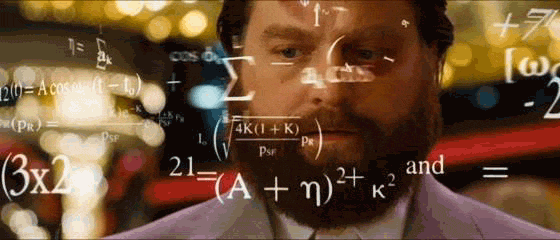

In [ ]:
%%time

NUM_FOLDS = 7
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=0)


features = loading_features + fnc_features

overal_score = 0
for target, c, w in [("age", 100, 0.3), ("domain1_var1", 10, 0.175), ("domain1_var2", 10, 0.175), ("domain2_var1", 10, 0.175), ("domain2_var2", 10, 0.175)]:    
    y_oof = np.zeros(df.shape[0])
    y_test = np.zeros((test_df.shape[0], NUM_FOLDS))
    
    for f, (train_ind, val_ind) in enumerate(kf.split(df, df)):
        train_df, val_df = df.iloc[train_ind], df.iloc[val_ind]
        train_df = train_df[train_df[target].notnull()]

        model = SVR(C=c, cache_size=3000.0)
        model.fit(train_df[features], train_df[target])

        y_oof[val_ind] = model.predict(val_df[features])
        y_test[:, f] = model.predict(test_df[features])
        
    df["pred_{}".format(target)] = y_oof
    test_df[target] = y_test.mean(axis=1)
    
    score = metric(df[df[target].notnull()][target].values, df[df[target].notnull()]["pred_{}".format(target)].values)
    overal_score += w*score
    print(target, np.round(score, 4))
    print()
    
print("Overal score:", np.round(overal_score, 4))

# Submission Part

In [ ]:
sub_df = cudf.melt(test_df[["Id", "age", "domain1_var1", "domain1_var2", "domain2_var1", "domain2_var2"]], id_vars=["Id"], value_name="Predicted")
sub_df["Id"] = sub_df["Id"].astype("str") + "_" +  sub_df["variable"].astype("str")

sub_df = sub_df.drop("variable", axis=1).sort_values("Id")
assert sub_df.shape[0] == test_df.shape[0]*5
sub_df.head(10)

In [ ]:
sub_df.to_csv("submission.csv", index=False)

# <span style='color:Red'> Thanks for reading the notebook ❤ If you like, please Upvote 💕